In [3]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 
import pandasql as psql

In [4]:
#load the churn modelling problem dataset

Air_lines=pd.read_csv(r"C:\Users\Dlc\Downloads\Airlines.csv.zip",header=0)

#copy the file to backup files

Air_lines_BK=Air_lines.copy()

#display the first 5 records

Air_lines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
# to display dataset information
Air_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
# to display no of rows and coloumn of dataset
Air_lines.shape

(539383, 9)

In [7]:
Air_lines.nunique()

id             539383
Airline            18
Flight           6585
AirportFrom       293
AirportTo         293
DayOfWeek           7
Time             1131
Length            426
Delay               2
dtype: int64

In [9]:
#displaying duplicate values within dataset
Air_lines_dup=Air_lines[Air_lines.duplicated(keep='last')]
Air_lines

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [10]:
Air_lines=Air_lines.drop_duplicates()

In [11]:
Air_lines.duplicated().any()

Air_lines01=Air_lines.copy()

In [12]:
Q1 = psql.sqldf("select * from Air_lines01 where Delay = 1 ")
Q2 = psql.sqldf("select * from Air_lines01 where Delay = 0 ")

In [13]:
Q1.shape

(240264, 9)

In [14]:
Q3 = Q1.groupby('Delay', group_keys=False).apply(lambda x: x.sample(frac=0.12))
Q4 = Q2.groupby('Delay', group_keys=False).apply(lambda x: x.sample(frac=0.12))
Air_lines_new = Q3.append(Q4, ignore_index=True)
Air_lines_new.shape

(64726, 9)

In [15]:
Air_lines_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64726 entries, 0 to 64725
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64726 non-null  int64 
 1   Airline      64726 non-null  object
 2   Flight       64726 non-null  int64 
 3   AirportFrom  64726 non-null  object
 4   AirportTo    64726 non-null  object
 5   DayOfWeek    64726 non-null  int64 
 6   Time         64726 non-null  int64 
 7   Length       64726 non-null  int64 
 8   Delay        64726 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 4.4+ MB


In [16]:
# to identify missing values
Air_lines.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [17]:
# to handle categorical data
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

Air_lines['Airline']=LE.fit_transform(Air_lines['Airline'])
Air_lines['AirportFrom']=LE.fit_transform(Air_lines['AirportFrom'])
Air_lines['AirportTo']=LE.fit_transform(Air_lines['AirportTo'])

In [18]:
# to count the target variable with 0 and 1
Delay_count=Air_lines.Delay.value_counts()
print('Class 0:', Delay_count[0])
print('Class 1:', Delay_count[1])
print('Proportion:',round(Delay_count[0]/ Delay_count[1],2 ),':1')
print('Total records:',len(Air_lines))

Class 0: 299119
Class 1: 240264
Proportion: 1.24 :1
Total records: 539383


In [19]:
# to dispalythe concrete data information
Air_lines.describe()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,9.334527,2427.928630,144.116322,144.143162,3.929668,802.728963,132.202007,0.445442
std,155706.60446,5.306368,2067.429837,79.379776,79.353137,1.914664,278.045911,70.117016,0.497015
min,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,5.000000,712.000000,79.000000,79.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,10.000000,1809.000000,153.000000,153.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,15.000000,3745.000000,208.000000,208.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,17.000000,7814.000000,292.000000,292.000000,7.000000,1439.000000,655.000000,1.000000


In [20]:
#identify the independent and Target (dependent) variables

IndepVar=[]
for col in Air_lines.columns:
    if col!='Delay':
        IndepVar.append(col)
TargetVar='Delay'

x=Air_lines[IndepVar]
y=Air_lines[TargetVar]

In [21]:
#split the data into train and teat (random sampling)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((377568, 8), (161815, 8), (377568,), (161815,))

In [22]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [21]:
#load the result dataset for KNN

KNN_Results=pd.read_csv(r"C:\Users\Dlc\data52\KNN_results.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN ALGORITHM

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[40283 31627]
 [31731 58174]]
Outcome values : 
 40283 31627 31731 58174
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.56      0.56     71910
           0       0.65      0.65      0.65     89905

    accuracy                           0.61    161815
   macro avg       0.60      0.60      0.60    161815
weighted avg       0.61      0.61      0.61    161815

Accuracy : 60.8 %
Precision : 55.9 %
Recall : 56.0 %
F1 Score : 0.56
Specificity or True Negative Rate : 64.7 %
Balanced Accuracy : 60.4 %
MCC : 0
roc_auc_score: 0.604


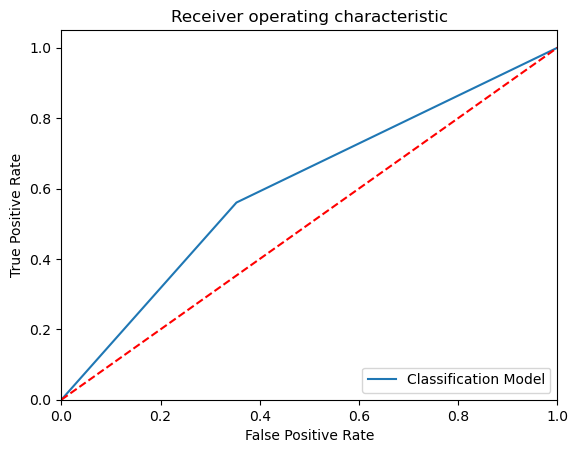

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[25299 46611]
 [14278 75627]]
Outcome values : 
 25299 46611 14278 75627
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.35      0.45     71910
           0       0.62      0.84      0.71     89905

    accuracy                           0.62    161815
   macro avg       0.63      0.60      0.58    161815
weighted avg       0.63      0.62      0.60    161815

Accuracy : 62.4 %
Precision : 63.9 %
Recall : 35.2 %
F1 Score : 0.454
Specificity or True Negative Rate : 84.1 %
Balanced Accuracy : 59.6 %
MCC : 0
roc_auc_score: 0.597


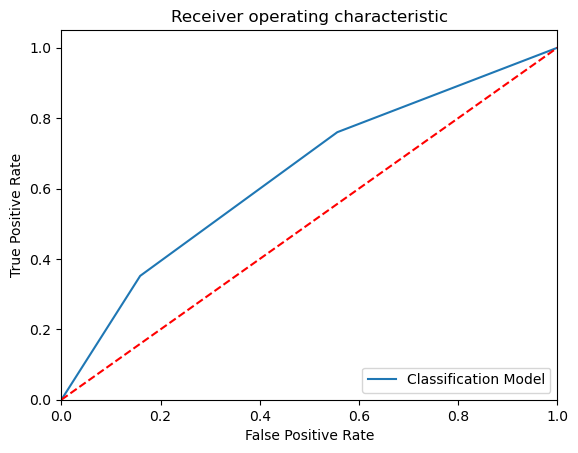

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[40538 31372]
 [28230 61675]]
Outcome values : 
 40538 31372 28230 61675
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.56      0.58     71910
           0       0.66      0.69      0.67     89905

    accuracy                           0.63    161815
   macro avg       0.63      0.62      0.63    161815
weighted avg       0.63      0.63      0.63    161815

Accuracy : 63.2 %
Precision : 58.9 %
Recall : 56.4 %
F1 Score : 0.576
Specificity or True Negative Rate : 68.6 %
Balanced Accuracy : 62.5 %
MCC : 0
roc_auc_score: 0.625


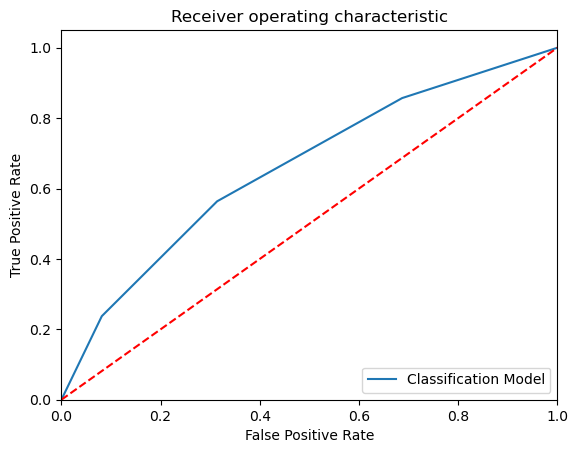

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[30437 41473]
 [16867 73038]]
Outcome values : 
 30437 41473 16867 73038
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.42      0.51     71910
           0       0.64      0.81      0.71     89905

    accuracy                           0.64    161815
   macro avg       0.64      0.62      0.61    161815
weighted avg       0.64      0.64      0.62    161815

Accuracy : 63.9 %
Precision : 64.3 %
Recall : 42.3 %
F1 Score : 0.511
Specificity or True Negative Rate : 81.2 %
Balanced Accuracy : 61.8 %
MCC : 0
roc_auc_score: 0.618


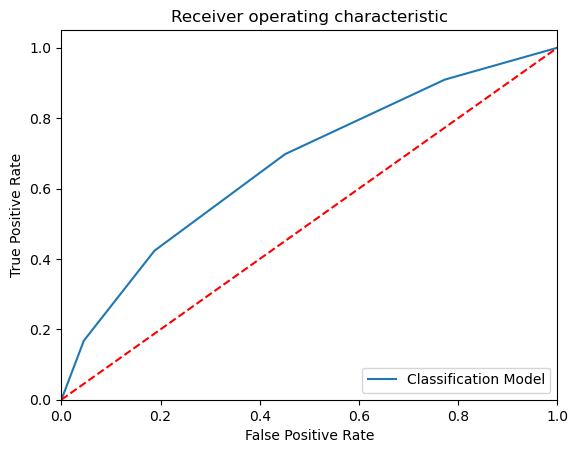

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[40460 31450]
 [26701 63204]]
Outcome values : 
 40460 31450 26701 63204
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.56      0.58     71910
           0       0.67      0.70      0.68     89905

    accuracy                           0.64    161815
   macro avg       0.64      0.63      0.63    161815
weighted avg       0.64      0.64      0.64    161815

Accuracy : 64.1 %
Precision : 60.2 %
Recall : 56.3 %
F1 Score : 0.582
Specificity or True Negative Rate : 70.3 %
Balanced Accuracy : 63.3 %
MCC : 0
roc_auc_score: 0.633


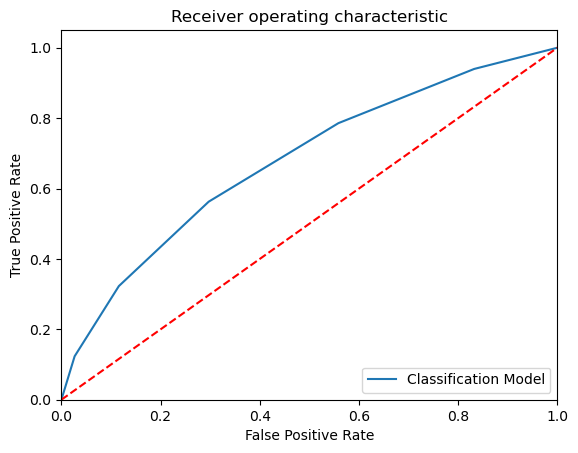

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[32601 39309]
 [17849 72056]]
Outcome values : 
 32601 39309 17849 72056
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.45      0.53     71910
           0       0.65      0.80      0.72     89905

    accuracy                           0.65    161815
   macro avg       0.65      0.63      0.62    161815
weighted avg       0.65      0.65      0.63    161815

Accuracy : 64.7 %
Precision : 64.6 %
Recall : 45.3 %
F1 Score : 0.533
Specificity or True Negative Rate : 80.1 %
Balanced Accuracy : 62.7 %
MCC : 0
roc_auc_score: 0.627


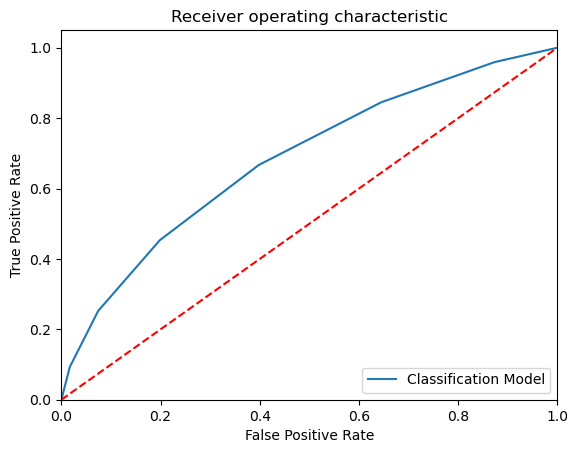

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[40275 31635]
 [25465 64440]]
Outcome values : 
 40275 31635 25465 64440
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.56      0.59     71910
           0       0.67      0.72      0.69     89905

    accuracy                           0.65    161815
   macro avg       0.64      0.64      0.64    161815
weighted avg       0.64      0.65      0.65    161815

Accuracy : 64.7 %
Precision : 61.3 %
Recall : 56.0 %
F1 Score : 0.585
Specificity or True Negative Rate : 71.7 %
Balanced Accuracy : 63.9 %
MCC : 0
roc_auc_score: 0.638


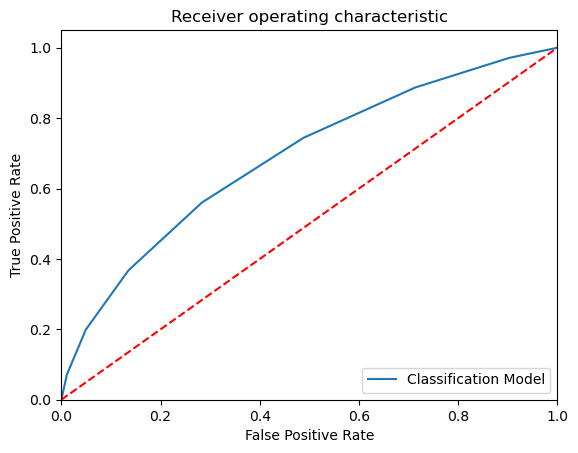

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[33778 38132]
 [18376 71529]]
Outcome values : 
 33778 38132 18376 71529
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.47      0.54     71910
           0       0.65      0.80      0.72     89905

    accuracy                           0.65    161815
   macro avg       0.65      0.63      0.63    161815
weighted avg       0.65      0.65      0.64    161815

Accuracy : 65.1 %
Precision : 64.8 %
Recall : 47.0 %
F1 Score : 0.545
Specificity or True Negative Rate : 79.6 %
Balanced Accuracy : 63.3 %
MCC : 0
roc_auc_score: 0.633


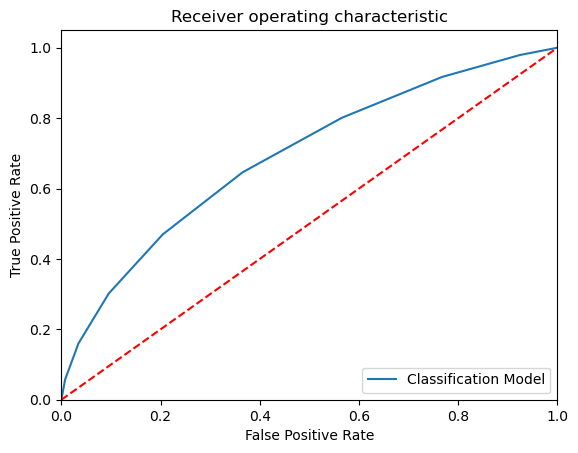

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[40124 31786]
 [24541 65364]]
Outcome values : 
 40124 31786 24541 65364
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.56      0.59     71910
           0       0.67      0.73      0.70     89905

    accuracy                           0.65    161815
   macro avg       0.65      0.64      0.64    161815
weighted avg       0.65      0.65      0.65    161815

Accuracy : 65.2 %
Precision : 62.0 %
Recall : 55.8 %
F1 Score : 0.588
Specificity or True Negative Rate : 72.7 %
Balanced Accuracy : 64.3 %
MCC : 0
roc_auc_score: 0.643


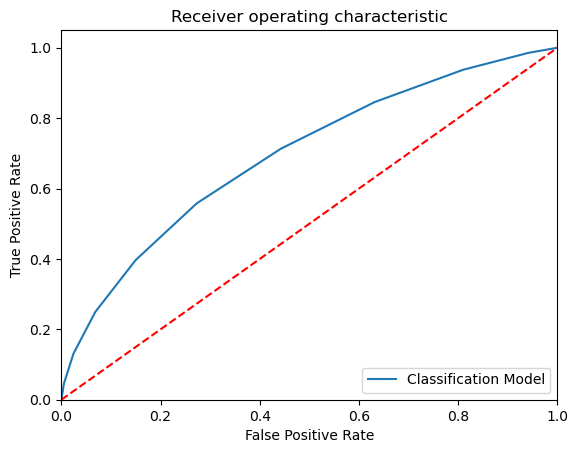

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[34622 37288]
 [18721 71184]]
Outcome values : 
 34622 37288 18721 71184
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.48      0.55     71910
           0       0.66      0.79      0.72     89905

    accuracy                           0.65    161815
   macro avg       0.65      0.64      0.64    161815
weighted avg       0.65      0.65      0.64    161815

Accuracy : 65.4 %
Precision : 64.9 %
Recall : 48.1 %
F1 Score : 0.553
Specificity or True Negative Rate : 79.2 %
Balanced Accuracy : 63.7 %
MCC : 0
roc_auc_score: 0.637


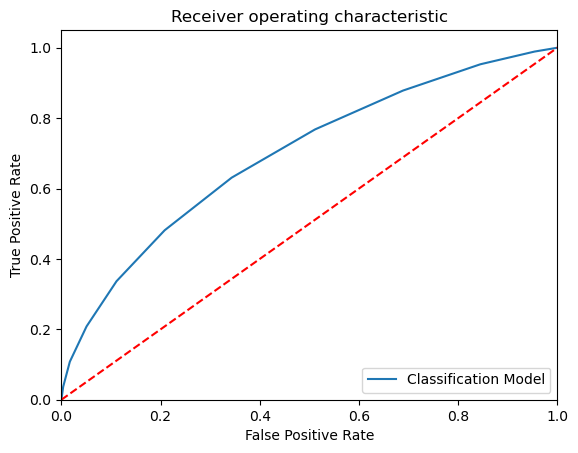

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[39989 31921]
 [24135 65770]]
Outcome values : 
 39989 31921 24135 65770
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.56      0.59     71910
           0       0.67      0.73      0.70     89905

    accuracy                           0.65    161815
   macro avg       0.65      0.64      0.64    161815
weighted avg       0.65      0.65      0.65    161815

Accuracy : 65.4 %
Precision : 62.4 %
Recall : 55.6 %
F1 Score : 0.588
Specificity or True Negative Rate : 73.2 %
Balanced Accuracy : 64.4 %
MCC : 0
roc_auc_score: 0.644


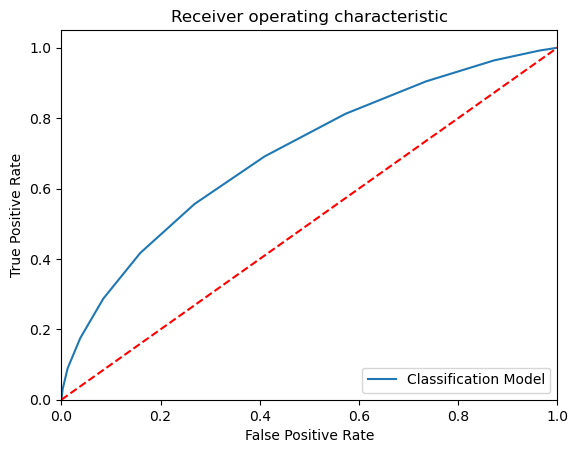

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[35143 36767]
 [18845 71060]]
Outcome values : 
 35143 36767 18845 71060
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.49      0.56     71910
           0       0.66      0.79      0.72     89905

    accuracy                           0.66    161815
   macro avg       0.65      0.64      0.64    161815
weighted avg       0.66      0.66      0.65    161815

Accuracy : 65.6 %
Precision : 65.1 %
Recall : 48.9 %
F1 Score : 0.558
Specificity or True Negative Rate : 79.0 %
Balanced Accuracy : 64.0 %
MCC : 0
roc_auc_score: 0.64


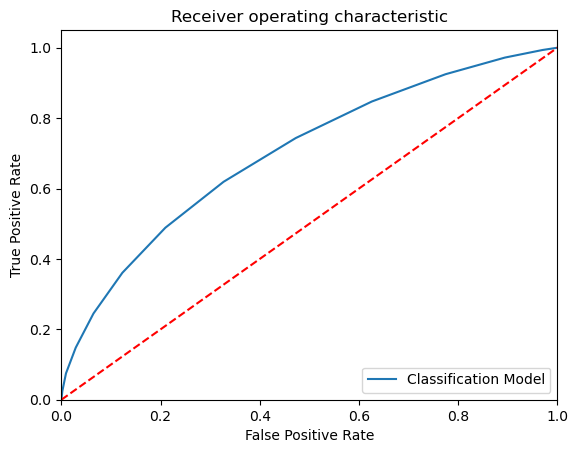

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[39836 32074]
 [23646 66259]]
Outcome values : 
 39836 32074 23646 66259
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.55      0.59     71910
           0       0.67      0.74      0.70     89905

    accuracy                           0.66    161815
   macro avg       0.65      0.65      0.65    161815
weighted avg       0.65      0.66      0.65    161815

Accuracy : 65.6 %
Precision : 62.8 %
Recall : 55.4 %
F1 Score : 0.588
Specificity or True Negative Rate : 73.7 %
Balanced Accuracy : 64.6 %
MCC : 0
roc_auc_score: 0.645


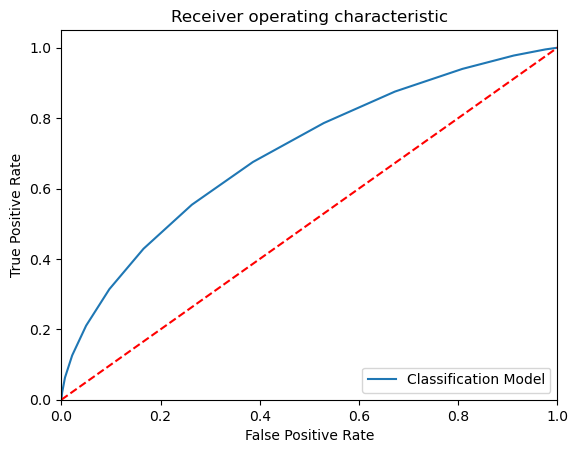

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[35521 36389]
 [19008 70897]]
Outcome values : 
 35521 36389 19008 70897
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.49      0.56     71910
           0       0.66      0.79      0.72     89905

    accuracy                           0.66    161815
   macro avg       0.66      0.64      0.64    161815
weighted avg       0.66      0.66      0.65    161815

Accuracy : 65.8 %
Precision : 65.1 %
Recall : 49.4 %
F1 Score : 0.562
Specificity or True Negative Rate : 78.9 %
Balanced Accuracy : 64.2 %
MCC : 0
roc_auc_score: 0.641


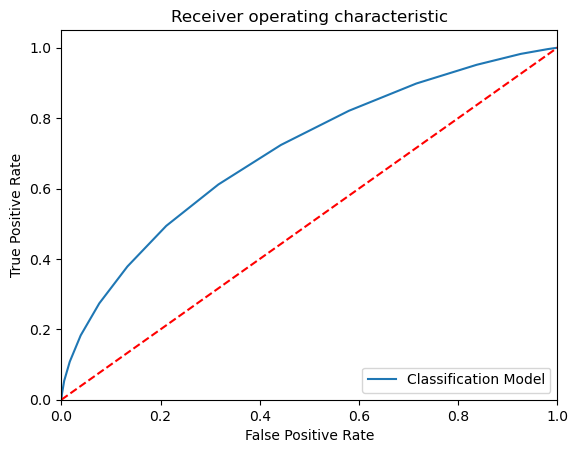

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[39684 32226]
 [23273 66632]]
Outcome values : 
 39684 32226 23273 66632
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.55      0.59     71910
           0       0.67      0.74      0.71     89905

    accuracy                           0.66    161815
   macro avg       0.65      0.65      0.65    161815
weighted avg       0.65      0.66      0.65    161815

Accuracy : 65.7 %
Precision : 63.0 %
Recall : 55.2 %
F1 Score : 0.588
Specificity or True Negative Rate : 74.1 %
Balanced Accuracy : 64.7 %
MCC : 0
roc_auc_score: 0.646


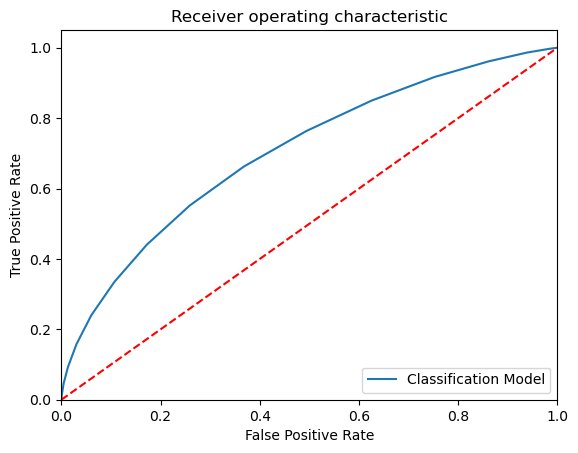

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[35710 36200]
 [19297 70608]]
Outcome values : 
 35710 36200 19297 70608
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.50      0.56     71910
           0       0.66      0.79      0.72     89905

    accuracy                           0.66    161815
   macro avg       0.66      0.64      0.64    161815
weighted avg       0.66      0.66      0.65    161815

Accuracy : 65.7 %
Precision : 64.9 %
Recall : 49.7 %
F1 Score : 0.563
Specificity or True Negative Rate : 78.5 %
Balanced Accuracy : 64.1 %
MCC : 0
roc_auc_score: 0.641


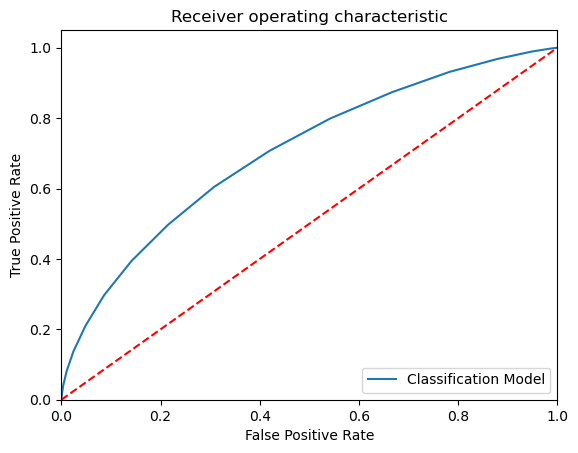

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[39611 32299]
 [23199 66706]]
Outcome values : 
 39611 32299 23199 66706
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.55      0.59     71910
           0       0.67      0.74      0.71     89905

    accuracy                           0.66    161815
   macro avg       0.65      0.65      0.65    161815
weighted avg       0.65      0.66      0.65    161815

Accuracy : 65.7 %
Precision : 63.1 %
Recall : 55.1 %
F1 Score : 0.588
Specificity or True Negative Rate : 74.2 %
Balanced Accuracy : 64.7 %
MCC : 0
roc_auc_score: 0.646


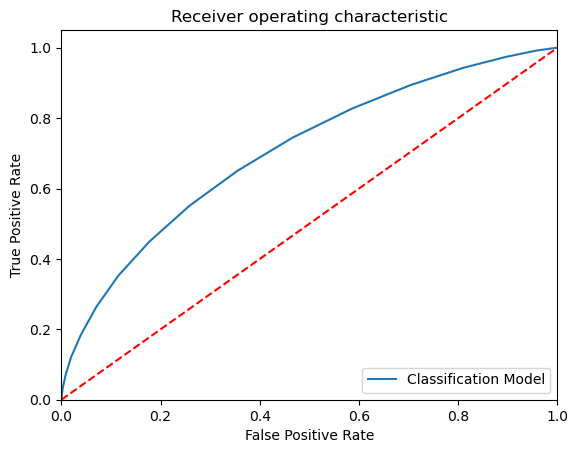

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[36035 35875]
 [19357 70548]]
Outcome values : 
 36035 35875 19357 70548
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.50      0.57     71910
           0       0.66      0.78      0.72     89905

    accuracy                           0.66    161815
   macro avg       0.66      0.64      0.64    161815
weighted avg       0.66      0.66      0.65    161815

Accuracy : 65.9 %
Precision : 65.1 %
Recall : 50.1 %
F1 Score : 0.566
Specificity or True Negative Rate : 78.5 %
Balanced Accuracy : 64.3 %
MCC : 0
roc_auc_score: 0.643


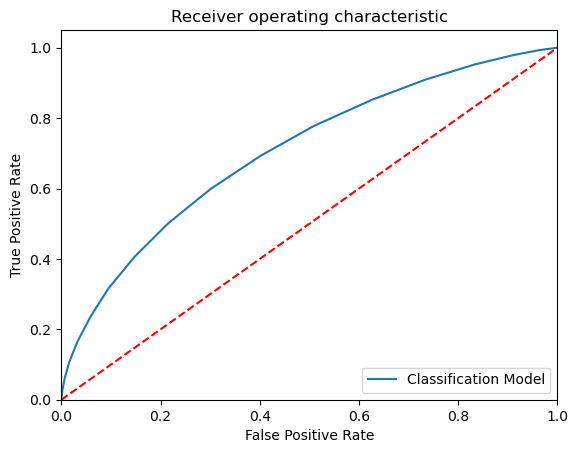

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[39487 32423]
 [22957 66948]]
Outcome values : 
 39487 32423 22957 66948
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.55      0.59     71910
           0       0.67      0.74      0.71     89905

    accuracy                           0.66    161815
   macro avg       0.65      0.65      0.65    161815
weighted avg       0.66      0.66      0.65    161815

Accuracy : 65.8 %
Precision : 63.2 %
Recall : 54.9 %
F1 Score : 0.588
Specificity or True Negative Rate : 74.5 %
Balanced Accuracy : 64.7 %
MCC : 0
roc_auc_score: 0.647


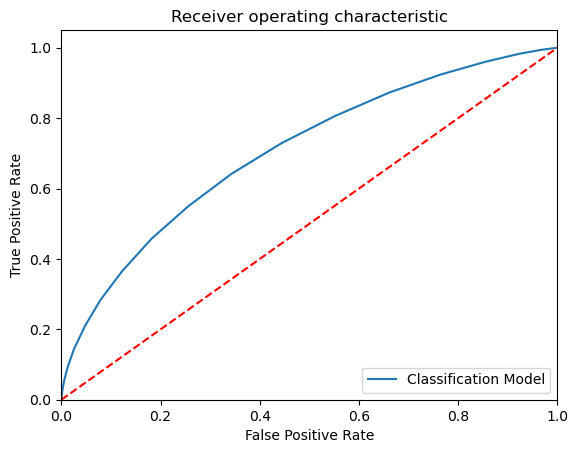

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[36233 35677]
 [19457 70448]]
Outcome values : 
 36233 35677 19457 70448
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.50      0.57     71910
           0       0.66      0.78      0.72     89905

    accuracy                           0.66    161815
   macro avg       0.66      0.64      0.64    161815
weighted avg       0.66      0.66      0.65    161815

Accuracy : 65.9 %
Precision : 65.1 %
Recall : 50.4 %
F1 Score : 0.568
Specificity or True Negative Rate : 78.4 %
Balanced Accuracy : 64.4 %
MCC : 0
roc_auc_score: 0.644


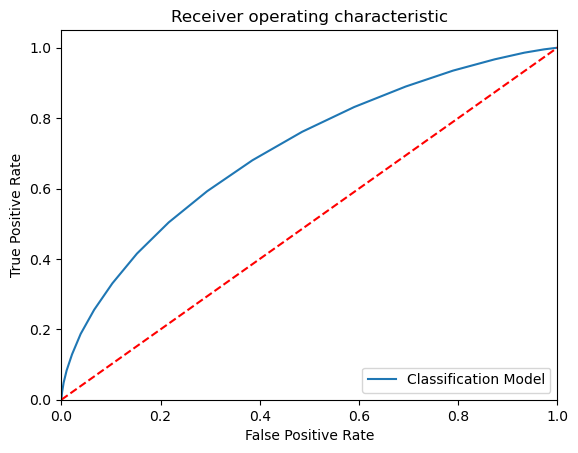

In [22]:

# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC=0
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [23]:
KNN_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,40283,31627,31731,58174,0.608,0.559,0.560,0.560,0.647,0,0.603624,0.604
1,KNeighborsClassifier(n_neighbors=2),2,25299,46611,14278,75627,0.624,0.639,0.352,0.454,0.841,0,0.596501,0.596
2,KNeighborsClassifier(n_neighbors=3),3,40538,31372,28230,61675,0.632,0.589,0.564,0.576,0.686,0,0.624867,0.625
3,KNeighborsClassifier(n_neighbors=4),4,30437,41473,16867,73038,0.639,0.643,0.423,0.511,0.812,0,0.617828,0.618
4,KNeighborsClassifier(),5,40460,31450,26701,63204,0.641,0.602,0.563,0.582,0.703,0,0.632828,0.633
5,KNeighborsClassifier(n_neighbors=6),6,32601,39309,17849,72056,0.647,0.646,0.453,0.533,0.801,0,0.627413,0.627
6,KNeighborsClassifier(n_neighbors=7),7,40275,31635,25465,64440,0.647,0.613,0.560,0.585,0.717,0,0.638416,0.639
7,KNeighborsClassifier(n_neighbors=8),8,33778,38132,18376,71529,0.651,0.648,0.470,0.545,0.796,0,0.632666,0.633
8,KNeighborsClassifier(n_neighbors=9),9,40124,31786,24541,65364,0.652,0.620,0.558,0.588,0.727,0,0.642505,0.643
9,KNeighborsClassifier(n_neighbors=10),10,34622,37288,18721,71184,0.654,0.649,0.481,0.553,0.792,0,0.636616,0.637


# compare algorithms

In [23]:
#load the problem dataset

EM_Results=pd.read_csv(r"C:\Users\Dlc\data52\EMResults.csv",header=0)

EM_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[29545 42365]
 [22099 67806]]
Outcome values : 
 29545 42365 22099 67806
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.41      0.48     71910
           0       0.62      0.75      0.68     89905

    accuracy                           0.60    161815
   macro avg       0.59      0.58      0.58    161815
weighted avg       0.60      0.60      0.59    161815

Accuracy : 60.2 %
Precision : 57.2 %
Recall : 41.1 %
F1 Score : 0.478
Specificity or True Negative Rate : 75.4 %
Balanced Accuracy : 58.2 %
MCC : 0
roc_auc_score: 0.583


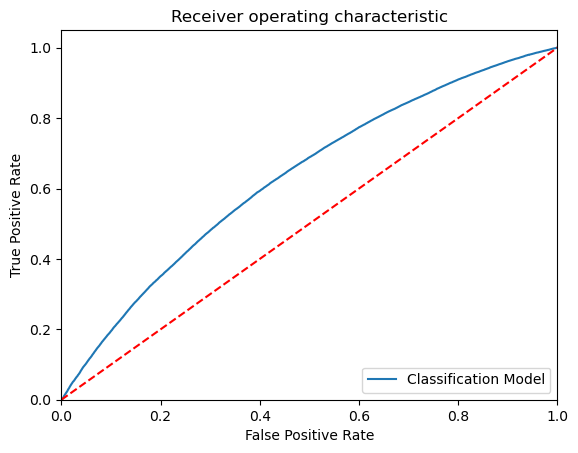

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[41822 30088]
 [30959 58946]]
Outcome values : 
 41822 30088 30959 58946
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.58      0.58     71910
           0       0.66      0.66      0.66     89905

    accuracy                           0.62    161815
   macro avg       0.62      0.62      0.62    161815
weighted avg       0.62      0.62      0.62    161815

Accuracy : 62.3 %
Precision : 57.5 %
Recall : 58.2 %
F1 Score : 0.578
Specificity or True Negative Rate : 65.6 %
Balanced Accuracy : 61.9 %
MCC : 0
roc_auc_score: 0.619


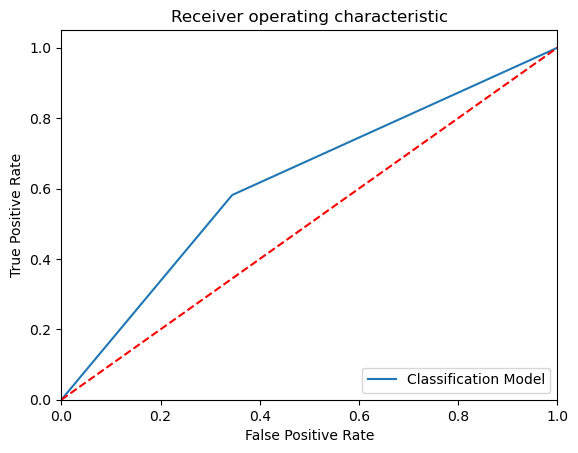

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[42630 29280]
 [20894 69011]]
Outcome values : 
 42630 29280 20894 69011
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.59      0.63     71910
           0       0.70      0.77      0.73     89905

    accuracy                           0.69    161815
   macro avg       0.69      0.68      0.68    161815
weighted avg       0.69      0.69      0.69    161815

Accuracy : 69.0 %
Precision : 67.1 %
Recall : 59.3 %
F1 Score : 0.63
Specificity or True Negative Rate : 76.8 %
Balanced Accuracy : 68.0 %
MCC : 0
roc_auc_score: 0.68


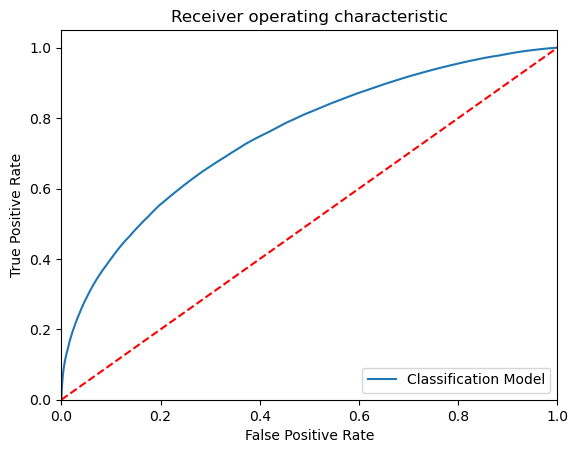

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[42131 29779]
 [20735 69170]]
Outcome values : 
 42131 29779 20735 69170
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.59      0.63     71910
           0       0.70      0.77      0.73     89905

    accuracy                           0.69    161815
   macro avg       0.68      0.68      0.68    161815
weighted avg       0.69      0.69      0.68    161815

Accuracy : 68.8 %
Precision : 67.0 %
Recall : 58.6 %
F1 Score : 0.625
Specificity or True Negative Rate : 76.9 %
Balanced Accuracy : 67.8 %
MCC : 0
roc_auc_score: 0.678


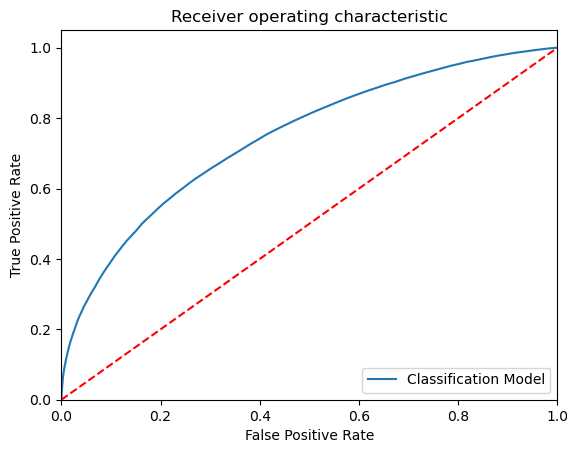

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[40460 31450]
 [26701 63204]]
Outcome values : 
 40460 31450 26701 63204
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.56      0.58     71910
           0       0.67      0.70      0.68     89905

    accuracy                           0.64    161815
   macro avg       0.64      0.63      0.63    161815
weighted avg       0.64      0.64      0.64    161815

Accuracy : 64.1 %
Precision : 60.2 %
Recall : 56.3 %
F1 Score : 0.582
Specificity or True Negative Rate : 70.3 %
Balanced Accuracy : 63.3 %
MCC : 0
roc_auc_score: 0.633


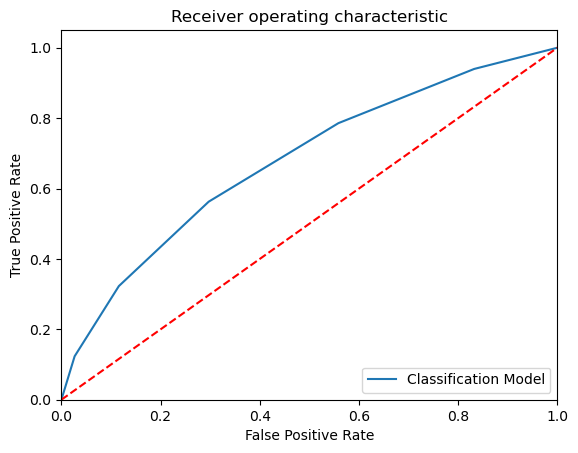

-----------------------------------------------------------------------------------------------------


In [24]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
#ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC=0

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EM_Results = EM_Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [25]:
EM_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),29545,42365,22099,67806,0.602,0.572,0.411,0.478,0.754,0,0.582528,0.582
1,DecisionTreeClassifier(),41822,30088,30959,58946,0.623,0.575,0.582,0.578,0.656,0,0.618618,0.619
2,"(DecisionTreeClassifier(max_features='auto', r...",42630,29280,20894,69011,0.690,0.671,0.593,0.630,0.768,0,0.680212,0.680
3,"(ExtraTreeClassifier(random_state=1051868442),...",42131,29779,20735,69170,0.688,0.670,0.586,0.625,0.769,0,0.677626,0.678
4,KNeighborsClassifier(),40460,31450,26701,63204,0.641,0.602,0.563,0.582,0.703,0,0.632828,0.633


In [26]:
# to pedict values with kNN algorithm 
y_predDC=ModelDC.predict(x_test)

In [27]:
#create new dataframe with 'Actual' vs 'Predict' values

Results=pd.DataFrame({'Delay_A':y_test,'Delay_P':y_pred})

#merge two dataframes on index of both the datafames

ResultsFinal=Air_lines_BK.merge(Results,left_index=True,right_index=True)

#display 5 records randomly

ResultsFinal.sample(5)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Delay_A,Delay_P
535624,535625,OO,6448,EUG,PDX,5,979,37,1,1,0
314144,314145,EV,5513,MEM,RDU,7,510,114,0,0,0
378547,378548,EV,5021,LIT,ATL,3,1010,99,0,0,1
156743,156744,F9,285,STL,DEN,5,375,144,0,0,1
314682,314683,WN,117,SAN,SMF,7,535,95,1,1,1
